# 주의

어떤 모델이 Input Size가 2048이라면 4096개 중에서 앞의 2048만 사용

# Cell 0. Data_Prepare 설계

In [2]:
import os
import scipy.io as sio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def Data_Prepare():
    current_dir = os.getcwd()
    base_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "12k")
    save_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Preprocessing(DE)")

    fault_types = ['N', 'B', 'IR', 'OR@06']

    # Create directories for Data Preprocessing
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for fault in fault_types:
        os.makedirs(os.path.join(save_path, fault), exist_ok=True)

    # Loop through all files in the directory
    try:
        if not os.path.exists(base_path):
            raise FileNotFoundError(f"Base path does not exist: {base_path}")

        for file in os.listdir(base_path):
            if file.endswith('.mat') and '_028' not in file:
                file_path = os.path.join(base_path, file)

                # Load MATLAB file
                mat_data = sio.loadmat(file_path)

                # Extract DE (Drive End) data (dynamic key detection for DE_time)
                de_key = next((key for key in mat_data.keys() if "DE_time" in key), None)
                if de_key:
                    de_data = mat_data[de_key].flatten()
                else:
                    print(f"No DE_time data found in file: {file}")
                    continue

                # Determine fault type from file name
                fault_type = file.split('_')[0]
                if fault_type not in fault_types:
                    print(f"Unknown fault type in file name: {file}")
                    continue

                # Save DE data as CSV without header
                fault_save_path = os.path.join(save_path, fault_type)
                csv_save_path = os.path.join(fault_save_path, f"{file.replace('_DE', '')[:-4]}.csv")
                if not os.path.exists(csv_save_path):
                    pd.DataFrame(de_data).to_csv(csv_save_path, index=False, header=False)
                    print(f"Processed and saved DE data for file: {file}")
                else:
                    print(f"CSV already exists for file: {file}, skipping creation.")

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred: {e}")

Data_Prepare()

CSV already exists for file: B_007_0.mat, skipping creation.
CSV already exists for file: B_007_1.mat, skipping creation.
CSV already exists for file: B_007_2.mat, skipping creation.
CSV already exists for file: B_007_3.mat, skipping creation.
CSV already exists for file: B_014_0.mat, skipping creation.
CSV already exists for file: B_014_1.mat, skipping creation.
CSV already exists for file: B_014_2.mat, skipping creation.
CSV already exists for file: B_014_3.mat, skipping creation.
CSV already exists for file: B_021_0.mat, skipping creation.
CSV already exists for file: B_021_1.mat, skipping creation.
CSV already exists for file: B_021_2.mat, skipping creation.
CSV already exists for file: B_021_3.mat, skipping creation.
CSV already exists for file: IR_007_0.mat, skipping creation.
CSV already exists for file: IR_007_1.mat, skipping creation.
CSV already exists for file: IR_007_2.mat, skipping creation.
CSV already exists for file: IR_007_3.mat, skipping creation.
CSV already exists f

### .mat 파일 확인

In [4]:
import os
import scipy.io as sio
import pandas as pd

# Set the base path and file name
current_dir = os.getcwd()
base_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "12k")
file_name = "OR@06_007_0.mat"
file_path = os.path.join(base_path, file_name)

mat_data = sio.loadmat(file_path)
print(mat_data)
print(type(mat_data))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:59:43 2000', '__version__': '1.0', '__globals__': [], 'X130_DE_time': array([[ 0.00852784],
       [ 0.4235496 ],
       [ 0.01299481],
       ...,
       [ 0.17583603],
       [ 0.1100498 ],
       [-0.10274022]]), 'X130_FE_time': array([[-0.40700545],
       [ 0.26277636],
       [ 0.49514545],
       ...,
       [ 0.05958182],
       [-0.05074727],
       [ 0.02732545]]), 'X130_BA_time': array([[-4.02373887e-05],
       [ 6.93290208e-02],
       [ 3.06608902e-02],
       ...,
       [ 1.18297923e-01],
       [ 5.66542433e-02],
       [-1.05019585e-02]]), 'X130RPM': array([[1796]], dtype=uint16)}
<class 'dict'>


# Cell 1. Data 분할

In [5]:
def Data_Division():
    current_dir = os.getcwd()
    preprocessing_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Preprocessing(DE)")
    division_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Division")

    fault_types = ['N', 'B', 'IR', 'OR@06']

    # Create directories for Data Division
    if not os.path.exists(division_path):
        os.makedirs(division_path)
    for fault in fault_types:
        fault_total_path = os.path.join(division_path, fault, "Total")
        fault_sample_path = os.path.join(division_path, fault, "Samples")
        os.makedirs(fault_total_path, exist_ok=True)
        os.makedirs(fault_sample_path, exist_ok=True)

    # Process each file in the preprocessing directory
    for fault in fault_types:
        fault_dir = os.path.join(preprocessing_path, fault)
        if not os.path.exists(fault_dir):
            print(f"Fault directory does not exist: {fault_dir}")
            continue

        for file in os.listdir(fault_dir):
            if file.endswith('.csv'):
                file_path = os.path.join(fault_dir, file)
                data = pd.read_csv(file_path, header=None).values.flatten()

                # Split data into 6:2:2 ratio
                train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
                val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

                fault_total_path = os.path.join(division_path, fault, "Total")
                fault_sample_path = os.path.join(division_path, fault, "Samples")

                # Save Total datasets as CSV without header
                pd.DataFrame(train_data).to_csv(
                    os.path.join(fault_total_path, f"Total_Train_{file.replace('_DE', '')[:-4]}.csv"), index=False, header=False)
                pd.DataFrame(val_data).to_csv(
                    os.path.join(fault_total_path, f"Total_Validation_{file.replace('_DE', '')[:-4]}.csv"), index=False, header=False)
                pd.DataFrame(test_data).to_csv(
                    os.path.join(fault_total_path, f"Total_Test_{file.replace('_DE', '')[:-4]}.csv"), index=False, header=False)

                # Create samples for train, validation, and test
                # 여기서 마지막 남은 샘플은 안만들게 된다!
                def create_samples(dataset, dataset_name):
                    sample_size = 4096
                    shift_size = 2048
                    num_samples = (len(dataset) // shift_size) - 1

                    for i in range(num_samples):
                        start_idx = i * shift_size
                        end_idx = start_idx + sample_size
                        sample = dataset[start_idx:end_idx]

                        sample_file_name = f"{dataset_name}_{i+1}.csv"
                        pd.DataFrame(sample).to_csv(
                            os.path.join(fault_sample_path, sample_file_name), index=False, header=False)

                # Generate samples
                create_samples(train_data, f"Train_{file.replace('_DE', '')[:-4]}")
                create_samples(val_data, f"Validation_{file.replace('_DE', '')[:-4]}")
                create_samples(test_data, f"Test_{file.replace('_DE', '')[:-4]}")

                print(f"Processed and saved samples for file: {file}")

Data_Division()

Processed and saved samples for file: N_000_0.csv
Processed and saved samples for file: N_000_1.csv
Processed and saved samples for file: N_000_2.csv
Processed and saved samples for file: N_000_3.csv
Processed and saved samples for file: B_007_0.csv
Processed and saved samples for file: B_007_1.csv
Processed and saved samples for file: B_007_2.csv
Processed and saved samples for file: B_007_3.csv
Processed and saved samples for file: B_014_0.csv
Processed and saved samples for file: B_014_1.csv
Processed and saved samples for file: B_014_2.csv
Processed and saved samples for file: B_014_3.csv
Processed and saved samples for file: B_021_0.csv
Processed and saved samples for file: B_021_1.csv
Processed and saved samples for file: B_021_2.csv
Processed and saved samples for file: B_021_3.csv
Processed and saved samples for file: IR_007_0.csv
Processed and saved samples for file: IR_007_1.csv
Processed and saved samples for file: IR_007_2.csv
Processed and saved samples for file: IR_007_3.

## Fault Type 별 Train, Validation, Test 샘플 갯수 확인

In [6]:
import os
import pandas as pd

def Count_Sample_Files(Data):
    if Data == "CWRU":
        current_dir = os.getcwd()
        division_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Division")

        fault_types = ['N', 'B', 'IR', 'OR@06']
        counts = []

        for fault in fault_types:
            fault_sample_path = os.path.join(division_path, fault, "Samples")
            if not os.path.exists(fault_sample_path):
                print(f"Samples directory does not exist for Fault Type {fault}: {fault_sample_path}")
                continue

            fault_counts = {
                "Fault_Type": fault,
                "Train": 0,
                "Validation": 0,
                "Test": 0,
                "Train_007": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Validation_007": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Test_007": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Train_014": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Validation_014": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Test_014": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Train_021": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Validation_021": {"0": 0, "1": 0, "2": 0, "3": 0},
                "Test_021": {"0": 0, "1": 0, "2": 0, "3": 0}
            }

            # Count files in Samples directory
            for file in os.listdir(fault_sample_path):
                parts = file.split('_')
                if len(parts) < 4:
                    continue

                dataset_type, fault_type, rpm, index = parts[0], parts[1], parts[2], parts[3]
                if dataset_type in ["Train", "Validation", "Test"] and rpm in ["007", "014", "021"] and index in ["0", "1", "2", "3"]:
                    key = f"{dataset_type}_{rpm}"
                    fault_counts[key][index] += 1
                    fault_counts[dataset_type] += 1

            counts.append(fault_counts)

        # Flatten nested dictionaries for DataFrame
        flattened_counts = []
        for count in counts:
            flat_count = {"Fault_Type": count["Fault_Type"], "Train": count["Train"], "Validation": count["Validation"], "Test": count["Test"]}
            for key, subdict in count.items():
                if isinstance(subdict, dict):
                    for subkey, value in subdict.items():
                        flat_count[f"{key}_{subkey}"] = value
            flattened_counts.append(flat_count)

        # Convert counts to DataFrame and display
        df_counts = pd.DataFrame(flattened_counts)
        return df_counts

    else:
        print("This function is currently implemented for the CWRU dataset only.")


In [124]:
Count_Sample_Files('CWRU')

,Fault_Type,Train,Validation,Test,Train_007_0,Train_007_1,Train_007_2,Train_007_3,Validation_007_0,Validation_007_1,...,Train_021_2,Train_021_3,Validation_021_0,Validation_021_1,Validation_021_2,Validation_021_3,Test_021_0,Test_021_1,Test_021_2,Test_021_3
0,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B,408,120,120,34,34,34,34,10,10,...,34,34,10,10,10,10,10,10,10,10
2,IR,409,121,121,34,34,34,35,10,10,...,34,34,10,10,10,10,10,10,10,10
3,OR@06,408,120,120,34,34,34,34,10,10,...,34,34,10,10,10,10,10,10,10,10


In [7]:
# Count_Samples_Files 함수 정의

def Count_Sample_Files():
    current_dir = os.getcwd()
    division_path = os.path.join(current_dir, "..", "..", "..", "Dataset", "CWRU", "Data Division")
    
    fault_types = ['N', 'B', 'IR', 'OR@06']
    counts = []

    for fault in fault_types:
        fault_sample_path = os.path.join(division_path, fault, "Samples")
        if not os.path.exists(fault_sample_path):
            print(f"Samples directory does not exist for Fault Type {fault}: {fault_sample_path}")
            continue

        fault_counts = {
            "Fault_Type": fault,
            "Train": 0,
            "Validation": 0,
            "Test": 0,
            "Train_007": 0,
            "Validation_007": 0,
            "Test_007": 0,
            "Train_014": 0,
            "Validation_014": 0,
            "Test_014": 0,
            "Train_021": 0,
            "Validation_021": 0,
            "Test_021": 0
        }

        # Count files in Samples directory
        for file in os.listdir(fault_sample_path):
            if file.startswith("Train"):
                fault_counts["Train"] += 1
                if "007" in file:
                    fault_counts["Train_007"] += 1
                elif "014" in file:
                    fault_counts["Train_014"] += 1
                elif "021" in file:
                    fault_counts["Train_021"] += 1
            elif file.startswith("Validation"):
                fault_counts["Validation"] += 1
                if "007" in file:
                    fault_counts["Validation_007"] += 1
                elif "014" in file:
                    fault_counts["Validation_014"] += 1
                elif "021" in file:
                    fault_counts["Validation_021"] += 1
            elif file.startswith("Test"):
                fault_counts["Test"] += 1
                if "007" in file:
                    fault_counts["Test_007"] += 1
                elif "014" in file:
                    fault_counts["Test_014"] += 1
                elif "021" in file:
                    fault_counts["Test_021"] += 1

        counts.append(fault_counts)

    # Convert counts to DataFrame and display
    df_counts = pd.DataFrame(counts)
    return df_counts


In [121]:
Count_Sample_Files()

,Fault_Type,Train,Validation,Test,Train_007,Validation_007,Test_007,Train_014,Validation_014,Test_014,Train_021,Validation_021,Test_021
0,N,491,160,160,0,0,0,0,0,0,0,0,0
1,B,408,120,120,136,40,40,136,40,40,136,40,40
2,IR,409,121,121,137,41,41,136,40,40,136,40,40
3,OR@06,408,120,120,136,40,40,136,40,40,136,40,40


- 이제 007, 014, 021에 상관없이  
- 또, HP가 0,1,2,3인지 아닌지에 상관없이 Fault Type을 싹 묶어서 Train, Val, Test로 분할

# Cell 2. 클래스별 라벨링
N : 0, IR : 1, OR : 2, B : 3  
'{Train or Validation or Test}_{Fault Type}_{007 or 014 or 021}_{0 or 1 or 2 or 3}_{Sample Number}'  
따라서 Fault Type에 맞게 자동 라벨링을 진행시키자.

# Cell 3. WDCNN Baseline Model 설계  

In [41]:
import torch
print("CUDA 지원 여부:", torch.cuda.is_available())
print("GPU 개수:", torch.cuda.device_count())
print("GPU 이름:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")
print("CUDA 버전:", torch.version.cuda)
print("cuDNN 버전:", torch.backends.cudnn.version() if torch.cuda.is_available() else "None")


CUDA 지원 여부: True
GPU 개수: 1
GPU 이름: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA 버전: 11.8
cuDNN 버전: 90100


### Cell 3.1 모델 설계

In [13]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import shuffle

In [14]:
# Define paths
base_path = r"C:\Users\ChoiSeongHyeon\Desktop\Dataset\CWRU\Data Division"

# Fault type labels
fault_types = {'N': 0, 'IR': 1, 'OR@06': 2, 'B': 3}

# Load dataset
class CWRUDataset(Dataset):
    def __init__(self, dataset_type=Dataset):
        self.data = []
        self.labels = []

        for fault, label in fault_types.items():
            sample_path = os.path.join(base_path, fault, "Samples")

            if not os.path.exists(sample_path):
                print(f"Warning: Path does not exist - {sample_path}")
                continue

            for file in os.listdir(sample_path):
                if file.endswith('.csv') and dataset_type in file:
                    file_path = os.path.join(sample_path, file)
                    data = pd.read_csv(file_path, header=None).values.flatten()

                    if len(data) == 4096:
                        self.data.append(data)
                        self.labels.append(label)

        # Convert to PyTorch tensors
        self.data = torch.tensor(self.data, dtype=torch.float32).unsqueeze(1)  # (N, 1, 4096)
        self.labels = torch.tensor(self.labels, dtype=torch.long)

        # Validation & Test 데이터는 한 번만 섞기 (재현 가능하도록)
        if dataset_type in ["Validation", "Test"]:
            np.random.seed(42)
            indices = np.random.permutation(len(self.data))
            self.data = self.data[indices]
            self.labels = self.labels[indices]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# ✅ **WDCNN 모델**
class WDCNN(nn.Module):
    def __init__(self, first_kernel: int = 64, n_classes: int = 4):
        super(WDCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 16, first_kernel, stride=16, padding=24),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.MaxPool1d(2, 2),

            nn.Conv1d(16, 32, 3, stride=1, padding="same"),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2, 2),

            nn.Conv1d(32, 64, 3, stride=1, padding="same"),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2, 2),

            nn.Conv1d(64, 64, 3, stride=1, padding="same"),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2, 2),

            nn.Conv1d(64, 64, 3, stride=1, padding=0),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2, 2),
        )

        with torch.no_grad():
            dummy = torch.rand(1, 1, 4096)
            dummy = self.conv_layers(dummy)
            dummy = torch.flatten(dummy, 1)
            lin_input = dummy.shape[1]

        self.linear_layers = nn.Sequential(
            nn.Linear(lin_input, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            # nn.Dropout(0.3),

            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            # nn.Dropout(0.2),

            # nn.Linear(32, 8),
            # nn.BatchNorm1d(8),
            # nn.ReLU(),

            nn.Linear(8, n_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.linear_layers(x)
        return x


In [15]:
# ✅ **훈련 코드 (각 배치 크기에서 초기 가중치 저장)**
def train_model(train_dataset, val_dataset, batch_sizes=[32, 64, 128, 256], num_epochs=500, learning_rate=0.01, patience=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    best_overall_acc = 0.0
    best_batch_size = None
    best_model_path = "best_overall_model.pth"
    best_initial_weights_path = "best_initial_weights.pth"

    for batch_size in batch_sizes:
        print(f"\n🔹 Training with Batch Size: {batch_size}")

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        model = WDCNN().to(device)

        # 🔹 **현재 배치 크기의 초기 가중치를 저장**
        init_weights_path = f"initial_weights_bs{batch_size}.pth"
        torch.save(model.state_dict(), init_weights_path)
        print(f"✅ Initial weights saved for batch {batch_size}!")

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

        best_val_acc = 0.0
        early_stop_counter = 0

        for epoch in range(num_epochs):
            model.train()
            train_loss, train_correct = 0.0, 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                train_correct += (outputs.argmax(dim=1) == labels).sum().item()

            train_acc = train_correct / len(train_loader.dataset)

            # Validation
            model.eval()
            val_loss, val_correct = 0.0, 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            scheduler.step(val_loss)

            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch+1}: Batch {batch_size}, LR: {current_lr:.6f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

            # Save best model for current batch size
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                early_stop_counter = 0
                torch.save(model.state_dict(), f"best_model_bs{batch_size}.pth")
                print(f"✅ Best model saved (Batch {batch_size}) with val_acc {best_val_acc:.4f}")
            else:
                early_stop_counter += 1

            if early_stop_counter >= patience:
                print(f"🛑 Early stopping at epoch {epoch+1}")
                break

        # Save best overall model and corresponding initial weights
        if best_val_acc > best_overall_acc:
            best_overall_acc = best_val_acc
            best_batch_size = batch_size
            torch.save(model.state_dict(), best_model_path)
            best_initial_weights_path = init_weights_path  # 🔹 최고 성능 모델의 초기 가중치 업데이트
            print(f"\n🏆 New Best Overall Model Saved! Val Acc: {best_overall_acc:.4f} (Batch {best_batch_size})")

    print(f"\n✅ Training completed! Best model: {best_model_path} from batch size {best_batch_size}")
    print(f"🎯 Best Initial Weights Saved: {best_initial_weights_path}")

# Load data
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")

# Train with dynamic batch size
# train_model(train_dataset, val_dataset)


## Cell 3.2 성능 평가

In [16]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix


📌 Classification Report:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       160
          IR       0.99      0.97      0.98       121
       OR@06       0.98      0.99      0.99       120
           B       0.98      0.99      0.98       120

    accuracy                           0.99       521
   macro avg       0.99      0.99      0.99       521
weighted avg       0.99      0.99      0.99       521



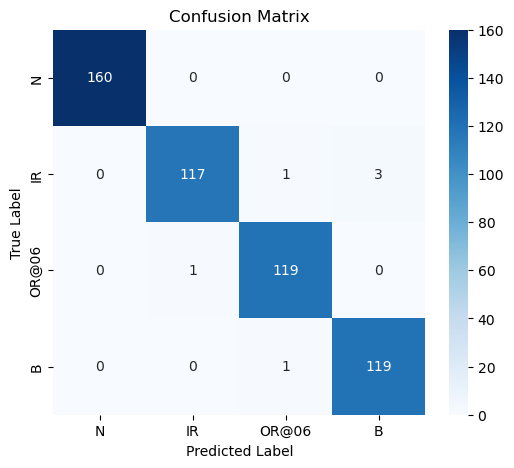

In [19]:
# 🔹 Function to Evaluate Model on Test Set
def evaluate_model(model, test_loader, device):
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    # 🔹 Print Classification Report
    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=fault_types.keys()))

    # 🔹 Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=fault_types.keys(), yticklabels=fault_types.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


# 🔹 Initialize Trained Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WDCNN().to(device)

# 🔹 Load Best Model with Error Handling
checkpoint = torch.load("best_overall_model.pth", map_location=device)

if "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)

# 🔹 Load Test Dataset
test_dataset = CWRUDataset("Test")
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)  # 🔹 최적의 Batch Size 적용

# 🔹 Evaluate Model on Test Dataset
evaluate_model(model, test_loader, device)


## Cell 3.3 MFLOPs & No. of Params (M) 확인

torchinfo  
fvcore 새롭게 설치함  

conda install -c conda-forge torchinfo  
pip install fvcore


모델 구조 다시 가져오기

In [20]:
import torch
from torchinfo import summary
from fvcore.nn import FlopCountAnalysis, parameter_count

# ✅ 모델을 생성하고, 학습된 가중치를 불러오기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WDCNN().to(device)

# 🔹 모델 가중치 로드
checkpoint = torch.load("best_overall_model.pth", map_location=device)
if "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)

model.eval()

# 🔹 Dummy Input Tensor (Batch size=1, Channels=1, Signal length=4096)
dummy_input = torch.randn(1, 1, 4096).to(device)

# ✅ 1. 모델의 Parameter 수 계산
num_params = parameter_count(model)[""]
print(f"🔹 Total Number of Parameters: {num_params:,}")

# ✅ 2. 모델의 FLOPs 계산
flops = FlopCountAnalysis(model, dummy_input)
total_flops = flops.total()
mflops = total_flops / 1e6  # MFLOPs로 변환
print(f"🔹 Total FLOPs: {total_flops:,}")
print(f"🔹 Total MFLOPs: {mflops:.2f} MFLOPs")

# ✅ 3. torchinfo를 사용하여 상세한 모델 요약 출력
print("\n📌 Model Summary:")
summary(model, input_size=(1, 1, 4096))

Unsupported operator aten::max_pool1d encountered 5 time(s)
Unsupported operator aten::_convolution_mode encountered 3 time(s)


🔹 Total Number of Parameters: 41,404
🔹 Total FLOPs: 472,016
🔹 Total MFLOPs: 0.47 MFLOPs

📌 Model Summary:


Layer (type:depth-idx)                   Output Shape              Param #
WDCNN                                    [1, 4]                    --
├─Sequential: 1-1                        [1, 64, 7]                --
│    └─Conv1d: 2-1                       [1, 16, 256]              1,040
│    └─BatchNorm1d: 2-2                  [1, 16, 256]              32
│    └─ReLU: 2-3                         [1, 16, 256]              --
│    └─MaxPool1d: 2-4                    [1, 16, 128]              --
│    └─Conv1d: 2-5                       [1, 32, 128]              1,568
│    └─BatchNorm1d: 2-6                  [1, 32, 128]              64
│    └─ReLU: 2-7                         [1, 32, 128]              --
│    └─MaxPool1d: 2-8                    [1, 32, 64]               --
│    └─Conv1d: 2-9                       [1, 64, 64]               6,208
│    └─BatchNorm1d: 2-10                 [1, 64, 64]               128
│    └─ReLU: 2-11                        [1, 64, 64]               --
│    

# Cell 4. 동일 Pruning Ratio 대비 모델 성능 비교

## Cell 4.1 Unstructured Pruning 적용 모델 설계


📌 Classification Report:
              precision    recall  f1-score   support

           N       0.99      1.00      0.99       160
          IR       0.56      0.73      0.64       121
       OR@06       0.76      0.42      0.54       120
           B       0.76      0.87      0.81       120

    accuracy                           0.77       521
   macro avg       0.77      0.75      0.74       521
weighted avg       0.78      0.77      0.76       521



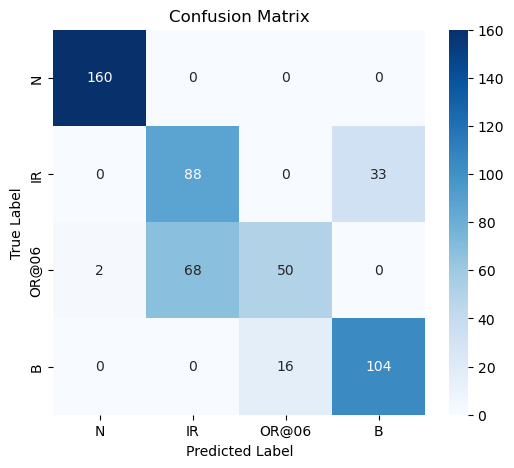

🔹 Total Sparsity: 40.00% (16243/40608 weights are zero)
🔹 Total Sparsity: 0.00% (0/41404 weights are zero)


0.0

In [21]:
# Cell 4: Unstructured Pruning
import torch.nn.utils.prune as prune
from copy import deepcopy

# Load Original Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
original_model = WDCNN()
original_model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))
original_model.to(device)

# Unstructured Pruning Function
def apply_unstructured_pruning(model, amount=0.5):
    pruned_model = deepcopy(model)  # Create a copy of the original model
    for name, module in pruned_model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):  # Prune Conv1d and Linear layers
            # weight말고 bias도 name의 인자로 될 수 있다고 함.
            prune.l1_unstructured(module, name="weight", amount=amount)
            # prune.remove(module, "weight")  # Remove pruning hooks to simplify the model
    return pruned_model

# Apply Unstructured Pruning with 50% sparsity
pruning_amount = 0.4
pruned_model = apply_unstructured_pruning(original_model, amount=pruning_amount)

# Evaluate Pruned Model
evaluate_model(pruned_model, test_loader, device)

# Calculate Sparsity
def calculate_sparsity(model):
    total_weights = 0
    zero_weights = 0
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            total_weights += module.weight.nelement()
            zero_weights += (module.weight == 0).sum().item()
    sparsity = zero_weights / total_weights
    print(f"🔹 Total Sparsity: {sparsity:.2%} ({zero_weights}/{total_weights} weights are zero)")
    return sparsity

def calculate_total_sparsity(model):
    total_weights = 0
    zero_weights = 0
    for name, param in model.named_parameters():  # 모든 가중치 가져오기
        if param.requires_grad:  # 학습 가능한 가중치만 고려
            total_weights += param.nelement()  # 전체 가중치 개수
            zero_weights += (param == 0).sum().item()  # 0이 된 가중치 개수
    sparsity = zero_weights / total_weights
    print(f"🔹 Total Sparsity: {sparsity:.2%} ({zero_weights}/{total_weights} weights are zero)")
    return sparsity


calculate_sparsity(pruned_model)
calculate_total_sparsity(pruned_model)


### 4.1.1 Unstructured Pruning Fine-Tuning

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader
from copy import deepcopy

# ※ WDCNN, CWRUDataset, calculate_sparsity 등은 미리 정의되어 있어야 합니다.

# ─────────────────────────────────────────────
# 🔹 Load Original Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ─────────────────────────────────────────────
# 🔹 Unstructured Pruning Function (Without Removing Mask)
def apply_sparse_training(model, amount):
    model = deepcopy(model)  # ✅ 모델 복사 후 Pruning 적용
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            prune.l1_unstructured(module, name="weight", amount=amount)
    return model  # ✅ Pruned된 모델 반환

# ─────────────────────────────────────────────
# 🔹 Fine-Tuning 후 Pruning Mask 제거 및 저장
def remove_pruning_and_save(model, save_path="best_unstructured_finetuned_model.pth"):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            prune.remove(module, "weight")  # ✅ Pruning 제거
    torch.save(model.state_dict(), save_path)  # ✅ 가중치 저장 (Pruning Mask 제거됨)
    print(f"✅ Pruning removed and model saved at {save_path}")

# ─────────────────────────────────────────────
# 🔹 Fine-Tuning Function for Unstructured Pruned Model
def fine_tune_unstructured_model(train_loader, val_loader, batch_sizes=[32, 64, 128],
                                 num_epochs=50, learning_rate=1e-4, patience=20):
    best_val_acc = 0.0
    best_model_path = "best_unstructured_finetuned_model.pth"
    best_pruned_model = None  # ✅ Best 모델 저장 변수

    for batch_size in batch_sizes:
        print(f"\n🔹 Fine-tuning with Batch Size: {batch_size}")

        model = WDCNN().to(device)
        model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))
        pruned_model = apply_sparse_training(model, amount=0.7)  # ✅ Pruned 모델 반환
        pruned_model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(pruned_model.parameters(), lr=learning_rate, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

        early_stop_counter = 0

        for epoch in range(num_epochs):
            pruned_model.train()
            train_correct = 0
            total_loss = 0.0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = pruned_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                train_correct += (outputs.argmax(dim=1) == labels).sum().item()

            train_acc = train_correct / len(train_loader.dataset)

            # Validation
            pruned_model.eval()
            val_correct = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = pruned_model(inputs)
                    val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            print(f"Epoch {epoch+1}: Batch {batch_size}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

            # Save Best Model (Pruning Mask 제거 후 저장)
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                early_stop_counter = 0
                best_pruned_model = deepcopy(pruned_model)  # ✅ Best 모델 저장
                print(f"✅ Best Unstructured Fine-tuned Model Saved with val_acc {best_val_acc:.4f}")
            else:
                early_stop_counter += 1

            if early_stop_counter >= patience:
                print(f"🛑 Early stopping at epoch {epoch+1}")
                break

    print(f"\n✅ Unstructured Fine-tuning Completed! Best Model: {best_model_path}")
    return best_pruned_model  # ✅ Fine-Tuning 후 Best 모델 반환

# ─────────────────────────────────────────────
# 🔹 Load CWRU Dataset (Train & Validation)
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# ─────────────────────────────────────────────
# 🔹 Fine-Tuning 실행 (훈련만 진행)
best_unstructured_pruned_model = fine_tune_unstructured_model(train_loader, val_loader,
                                                 batch_sizes=[32, 64, 128], num_epochs=50, learning_rate=1e-4, patience=20)



🔹 Fine-tuning with Batch Size: 32


c:\Users\ChoiSeongHyeon\anaconda3\envs\WinningT\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Batch 32, Train Acc: 0.9359, Val Acc: 0.9060
✅ Best Unstructured Fine-tuned Model Saved with val_acc 0.9060
Epoch 2: Batch 32, Train Acc: 0.9254, Val Acc: 0.9616
✅ Best Unstructured Fine-tuned Model Saved with val_acc 0.9616
Epoch 3: Batch 32, Train Acc: 0.9417, Val Acc: 0.9578
Epoch 4: Batch 32, Train Acc: 0.9161, Val Acc: 0.9578
Epoch 5: Batch 32, Train Acc: 0.9400, Val Acc: 0.9539
Epoch 6: Batch 32, Train Acc: 0.9312, Val Acc: 0.9539
Epoch 7: Batch 32, Train Acc: 0.9516, Val Acc: 0.9463
Epoch 8: Batch 32, Train Acc: 0.9592, Val Acc: 0.9655
✅ Best Unstructured Fine-tuned Model Saved with val_acc 0.9655
Epoch 9: Batch 32, Train Acc: 0.9627, Val Acc: 0.9520
Epoch 10: Batch 32, Train Acc: 0.9510, Val Acc: 0.9712
✅ Best Unstructured Fine-tuned Model Saved with val_acc 0.9712
Epoch 11: Batch 32, Train Acc: 0.9674, Val Acc: 0.9578
Epoch 12: Batch 32, Train Acc: 0.9510, Val Acc: 0.9635
Epoch 13: Batch 32, Train Acc: 0.9371, Val Acc: 0.9693
Epoch 14: Batch 32, Train Acc: 0.9685, Val

### 4.1.2 성능 평가

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 🔹 Function to Evaluate Model on Test Set
def evaluate_model(model, test_loader, device):
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=list(fault_types.keys())))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=list(fault_types.keys()),
                yticklabels=list(fault_types.keys()))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


# 🔹 Load Test Dataset
test_dataset = CWRUDataset("Test")
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# 🔹 Evaluate Model on Test Set
evaluate_model(best_unstructured_pruned_model, test_loader, device)

# 🔹 Sparsity 확인
calculate_sparsity(best_unstructured_pruned_model)


NameError: name 'best_unstructured_pruned_model' is not defined

## Cell 4.2 Structured Pruning 적용 모델 설계


📌 Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00       160
          IR       0.33      0.33      0.33       121
       OR@06       0.00      0.00      0.00       120
           B       0.30      1.00      0.46       120

    accuracy                           0.31       521
   macro avg       0.16      0.33      0.20       521
weighted avg       0.15      0.31      0.18       521



c:\Users\ChoiSeongHyeon\anaconda3\envs\WinningT\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ChoiSeongHyeon\anaconda3\envs\WinningT\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ChoiSeongHyeon\anaconda3\envs\WinningT\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

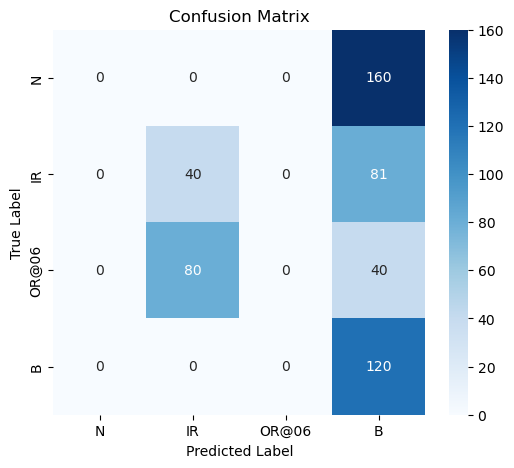

🔹 Total Sparsity: 40.98% (16640/40608 weights are zero)
🔹 Total Sparsity: 40.19% (16640/41404 weights are zero)


0.4018935368563424

In [ ]:
# Cell 4.2 Structured Pruning 적용
import torch.nn.utils.prune as prune
from copy import deepcopy

# Structured Pruning Function
def apply_structured_pruning(model, amount=0.5):
    pruned_model = deepcopy(model)  # Create a copy of the original model
    for name, module in pruned_model.named_modules():
        # 여기는 왜 Linear Layer가 없음?
        if isinstance(module, nn.Conv1d):
            # n : L-n Norm, dim : 0(출력 채널 단위 필터 제거), 1(입력 채널 단위 필터 제거거)
            prune.ln_structured(module, name="weight", amount=amount, n=2, dim=0)  # Prune entire filters
            prune.remove(module, "weight")
    return pruned_model

# Apply Structured Pruning with 50% sparsity
pruning_amount = 0.5
structured_pruned_model = apply_structured_pruning(original_model, amount=pruning_amount)

# Evaluate Structured Pruned Model
evaluate_model(structured_pruned_model, test_loader, device)

# Calculate Structured Sparsity
calculate_sparsity(structured_pruned_model)
calculate_total_sparsity(structured_pruned_model)


### 4.2.1 Structured Pruning Fine-Tuning

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader
from copy import deepcopy

# ※ WDCNN, CWRUDataset 모델이 정의되어 있어야 합니다.

# 🔹 Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Structured Pruning Function (필터 단위 Pruning)
def apply_structured_pruning(model, amount):
    model = deepcopy(model)  # ✅ 모델 복사 후 Pruning 적용
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d):  # ✅ Linear Layer 제외, Conv1d Layer만 Pruning
            prune.ln_structured(module, name="weight", amount=amount, n=2, dim=0)  # ✅ 필터 단위 Pruning
            # prune.remove(module, "weight")  # ✅ Pruning 적용 후 hook 제거
    return model  # ✅ Pruned된 모델 반환

# 🔹 Fine-Tuning 후 Pruning Mask 제거 및 저장
def remove_pruning_and_save(model, save_path="best_structured_finetuned_model.pth"):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d):  # ✅ Structured Pruning된 Conv1d Layer만 적용
            prune.remove(module, "weight")  # ✅ Pruning 제거
    torch.save(model.state_dict(), save_path)
    print(f"✅ Pruning removed and model saved at {save_path}")

# 🔹 Fine-Tuning Function for Structured Pruned Model
def fine_tune_structured_pruned_model(train_loader, val_loader, batch_sizes=[32, 64, 128],
                                      num_epochs=50, learning_rate=1e-4, patience=20):
    best_val_acc = 0.0
    best_model_path = "best_structured_finetuned_model.pth"
    best_pruned_model = None  # ✅ Best 모델 저장 변수

    for batch_size in batch_sizes:
        print(f"\n🔹 Fine-tuning with Batch Size: {batch_size}")

        model = WDCNN().to(device)
        model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))  # ✅ 원본 모델 로드
        pruned_model = apply_structured_pruning(model, amount=0.8)  # ✅ Structured Pruning 적용
        pruned_model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(pruned_model.parameters(), lr=learning_rate, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

        early_stop_counter = 0

        for epoch in range(num_epochs):
            pruned_model.train()
            train_correct = 0
            total_loss = 0.0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = pruned_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                train_correct += (outputs.argmax(dim=1) == labels).sum().item()

            train_acc = train_correct / len(train_loader.dataset)

            # Validation
            pruned_model.eval()
            val_correct = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = pruned_model(inputs)
                    val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            print(f"Epoch {epoch+1}: Batch {batch_size}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

            # Save Best Model (Pruning Mask 제거 후 저장)
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                early_stop_counter = 0
                best_pruned_model = deepcopy(pruned_model)  # ✅ Best 모델 저장
                print(f"✅ Best Structured Fine-tuned Model Saved with val_acc {best_val_acc:.4f}")
            else:
                early_stop_counter += 1

            if early_stop_counter >= patience:
                print(f"🛑 Early stopping at epoch {epoch+1}")
                break

    print(f"\n✅ Structured Fine-tuning Completed! Best Model: {best_model_path}")
    return best_pruned_model  # ✅ Fine-Tuning 후 Best 모델 반환

# 🔹 데이터 로드 및 Fine-tuning 실행
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

best_structured_pruned_model = fine_tune_structured_pruned_model(train_loader, val_loader,
                                                      batch_sizes=[32, 64, 128], num_epochs=50, learning_rate=1e-4, patience=20)



🔹 Fine-tuning with Batch Size: 32


c:\Users\ChoiSeongHyeon\anaconda3\envs\WinningT\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Batch 32, Train Acc: 0.8141, Val Acc: 0.4376
✅ Best Structured Fine-tuned Model Saved with val_acc 0.4376
Epoch 2: Batch 32, Train Acc: 0.8415, Val Acc: 0.8656
✅ Best Structured Fine-tuned Model Saved with val_acc 0.8656
Epoch 3: Batch 32, Train Acc: 0.8357, Val Acc: 0.5662
Epoch 4: Batch 32, Train Acc: 0.8328, Val Acc: 0.5432
Epoch 5: Batch 32, Train Acc: 0.8776, Val Acc: 0.7869
Epoch 6: Batch 32, Train Acc: 0.8677, Val Acc: 0.8752
✅ Best Structured Fine-tuned Model Saved with val_acc 0.8752
Epoch 7: Batch 32, Train Acc: 0.8677, Val Acc: 0.8637
Epoch 8: Batch 32, Train Acc: 0.8782, Val Acc: 0.8714
Epoch 9: Batch 32, Train Acc: 0.8735, Val Acc: 0.8714
Epoch 10: Batch 32, Train Acc: 0.8735, Val Acc: 0.8695
Epoch 11: Batch 32, Train Acc: 0.8986, Val Acc: 0.5662
Epoch 12: Batch 32, Train Acc: 0.8788, Val Acc: 0.7466
Epoch 13: Batch 32, Train Acc: 0.8998, Val Acc: 0.8656
Epoch 14: Batch 32, Train Acc: 0.8823, Val Acc: 0.5566
Epoch 15: Batch 32, Train Acc: 0.9015, Val Acc: 0.8311
E

### 4.2.2 성능 평가


📌 Classification Report:
              precision    recall  f1-score   support

           N       0.99      1.00      1.00       160
          IR       0.96      0.76      0.85       121
       OR@06       0.91      0.97      0.94       120
           B       0.85      0.96      0.90       120

    accuracy                           0.93       521
   macro avg       0.93      0.92      0.92       521
weighted avg       0.93      0.93      0.93       521



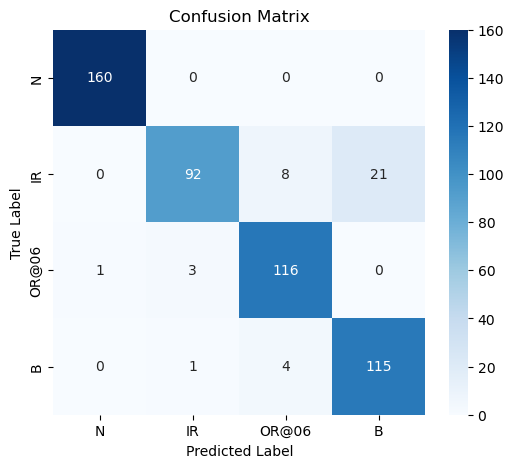


📌 Model Sparsity: 79.81% (26560/33280 weights are zero)


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 🔹 Function to Evaluate Model on Test Set
def evaluate_model(model, test_loader, device):
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=list(fault_types.keys())))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=list(fault_types.keys()),
                yticklabels=list(fault_types.keys()))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# 🔹 Load Test Dataset
test_dataset = CWRUDataset("Test")
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# 🔹 Evaluate Model on Test Set
evaluate_model(best_structured_pruned_model, test_loader, device)

# 🔹 Sparsity 확인
sparsity, total_weights, zero_weights = calculate_sparsity(best_structured_pruned_model)
print(f"\n📌 Model Sparsity: {sparsity:.2%} ({zero_weights}/{total_weights} weights are zero)")


## Cell 4.3 프루닝 비율 조정 Unstructured Pruning 비교

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader
from copy import deepcopy
import os
import pandas as pd

# 🔹 저장 폴더 설정
save_dir = "CWRU/Unstructured"
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성

# 🔹 Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 1000

# 🔹 Unstructured Pruning Function
def apply_sparse_training(model, amount):
    model = deepcopy(model)  # ✅ 모델 복사 후 Pruning 적용
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            prune.l1_unstructured(module, name="weight", amount=amount)
    return model  # ✅ Pruned된 모델 반환

# 🔹 Fine-Tuning 후 Pruning Mask 제거 및 저장
def remove_pruning_and_save(model, save_path):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            prune.remove(module, "weight")  # ✅ Pruning 제거
    torch.save(model.state_dict(), save_path)  # ✅ 가중치 저장 (Pruning Mask 제거됨)

# 🔹 Fine-Tuning 및 성능 측정 함수
def fine_tune_and_evaluate(pruning_amounts, train_loader, val_loader, num_epochs):
    results = []

    for pruning_amount in pruning_amounts:
        print(f"\n🔹 Fine-tuning with Pruning Amount: {pruning_amount}")

        model = WDCNN().to(device)
        model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))
        pruned_model = apply_sparse_training(model, amount=pruning_amount)  # ✅ Pruned 모델 반환
        pruned_model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(pruned_model.parameters(), lr=0.00001)  # ✅ Learning Rate 0.0001, Weight Decay 제거

        best_val_acc = 0.0
        best_pruned_model = None
        val_accuracies = []

        for epoch in range(num_epochs):
            pruned_model.train()
            train_correct = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = pruned_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_correct += (outputs.argmax(dim=1) == labels).sum().item()

            train_acc = train_correct / len(train_loader.dataset)

            # Validation
            pruned_model.eval()
            val_correct = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = pruned_model(inputs)
                    val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            val_accuracies.append(val_acc)

            print(f"Epoch {epoch+1}: Pruning {pruning_amount}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

            # Best 모델 저장
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_pruned_model = deepcopy(pruned_model)

        # 최적 모델 저장
        model_save_path = os.path.join(save_dir, f"best_unstructured_finetuned_{int(pruning_amount*100)}.pth")
        remove_pruning_and_save(best_pruned_model, model_save_path)

        results.append({"Pruning Ratio": pruning_amount, "Best Validation Accuracy": best_val_acc, "Validation Accuracy per Epoch": val_accuracies})

    return results

# 🔹 데이터 로드
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# 🔹 Pruning Ratio 설정 및 Fine-Tuning 실행
pruning_ratios = [0.2, 0.4, 0.6, 0.8]
experiment_results = fine_tune_and_evaluate(pruning_ratios, train_loader, val_loader, num_epochs)



🔹 Fine-tuning with Pruning Amount: 0.2
Epoch 1: Pruning 0.2, Train Acc: 0.9650, Val Acc: 0.9750
Epoch 2: Pruning 0.2, Train Acc: 0.9872, Val Acc: 0.9866
Epoch 3: Pruning 0.2, Train Acc: 0.9749, Val Acc: 0.9789
Epoch 4: Pruning 0.2, Train Acc: 0.9796, Val Acc: 0.9846
Epoch 5: Pruning 0.2, Train Acc: 0.9819, Val Acc: 0.9846
Epoch 6: Pruning 0.2, Train Acc: 0.9790, Val Acc: 0.9846
Epoch 7: Pruning 0.2, Train Acc: 0.9668, Val Acc: 0.9885
Epoch 8: Pruning 0.2, Train Acc: 0.9779, Val Acc: 0.9731
Epoch 9: Pruning 0.2, Train Acc: 0.9586, Val Acc: 0.9885
Epoch 10: Pruning 0.2, Train Acc: 0.9516, Val Acc: 0.9827
Epoch 11: Pruning 0.2, Train Acc: 0.9749, Val Acc: 0.9866
Epoch 12: Pruning 0.2, Train Acc: 0.9819, Val Acc: 0.9827
Epoch 13: Pruning 0.2, Train Acc: 0.9796, Val Acc: 0.9846
Epoch 14: Pruning 0.2, Train Acc: 0.9551, Val Acc: 0.9674
Epoch 15: Pruning 0.2, Train Acc: 0.9819, Val Acc: 0.9846
Epoch 16: Pruning 0.2, Train Acc: 0.9714, Val Acc: 0.9463
Epoch 17: Pruning 0.2, Train Acc: 0.9761,

### 4.3.1 Pruning Ratio별 Validation ACC Graph

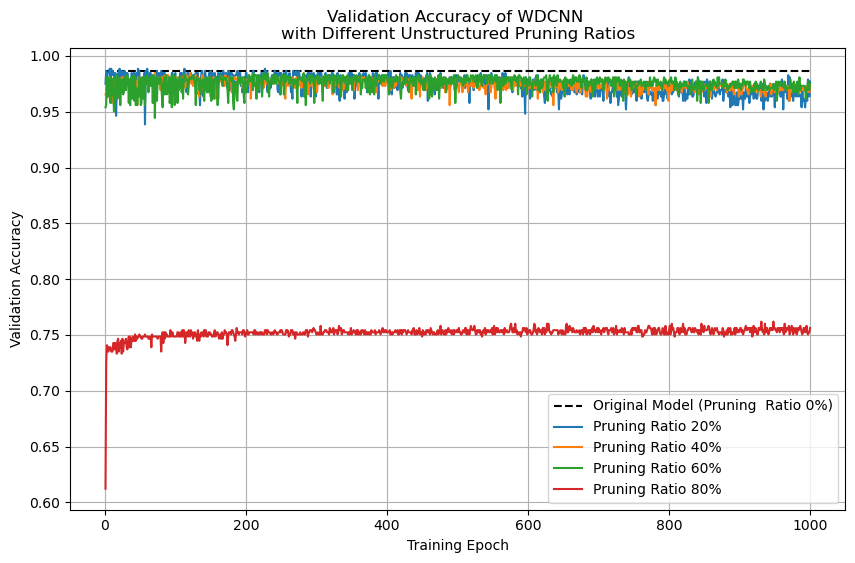

In [37]:
import matplotlib.pyplot as plt
import torch

# 🔹 Original Model 로드
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
original_model = WDCNN().to(device)
original_model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))

# 🔹 Original Model Validation Accuracy 측정
original_model.eval()
val_accuracies_original = []

with torch.no_grad():
    for epoch in range(1, num_epochs+1):  # ✅ 동일한 100 Epoch 기준
        val_correct = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = original_model(inputs)
            val_correct += (outputs.argmax(dim=1) == labels).sum().item()

        val_acc = val_correct / len(val_loader.dataset)
        val_accuracies_original.append(val_acc)

# 🔹 그래프 그리기
plt.figure(figsize=(10, 6))

# ✅ Original Model Plot (Pruning 0%)
plt.plot(range(1, num_epochs+1), val_accuracies_original, label="Original Model (Pruning  Ratio 0%)", linestyle="--", color="black")

# ✅ Pruned Models Plot
for result in experiment_results:
    pruning_ratio = result["Pruning Ratio"]
    val_accuracies = result["Validation Accuracy per Epoch"]
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label=f"Pruning Ratio {pruning_ratio*100:.0f}%")

plt.xlabel("Training Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of WDCNN \nwith Different Unstructured Pruning Ratios")
plt.legend()
plt.grid(True)
plt.show()


### 4.3.2 Test ACC 비교 Table

In [38]:
import pandas as pd
import torch
import time
import os
from IPython.display import display

# 🔹 전체 파라미터 수 계산 함수
def count_total_parameters(model):
    return sum(p.numel() for p in model.parameters())

# 🔹 비-제로 가중치 개수 계산 함수
def count_nonzero_parameters(model):
    return sum((p != 0).sum().item() for p in model.parameters() if p.requires_grad)

# 🔹 Inference Time 측정 함수 (100개 샘플 평균)
def measure_inference_time(model, test_loader, device, num_samples=100):
    model.eval()
    total_time = 0.0
    num_runs = 0

    with torch.no_grad():
        for inputs, _ in test_loader:
            if num_runs >= num_samples:
                break
            inputs = inputs.to(device)

            # 시간 측정 시작
            start_time = time.time()
            _ = model(inputs)
            end_time = time.time()

            total_time += (end_time - start_time)
            num_runs += 1

    return total_time / num_runs if num_runs > 0 else 0.0  # 평균 Inference Time (초)

# 🔹 Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Original Model 로드
original_model = WDCNN().to(device)
original_model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))

# 🔹 Original Model 정보 출력
total_params = count_total_parameters(original_model)
print(f"📌 Total Parameters in Original Model: {total_params:,}")

# 🔹 Original Model Test Accuracy 측정
original_model.eval()
test_correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = original_model(inputs)
        test_correct += (outputs.argmax(dim=1) == labels).sum().item()

original_test_acc = test_correct / len(test_loader.dataset)
original_inference_time = measure_inference_time(original_model, test_loader, device)

# 🔹 Test Accuracy 결과 저장
test_accuracies = [{
    "Pruning Ratio": 0.0, 
    "Number of Non-Zero Params": total_params, 
    "Inference Time (s)": original_inference_time,
    "Test Accuracy": original_test_acc
}]

# 🔹 Pruned Models Test Accuracy 측정
for result in experiment_results:
    pruning_ratio = result["Pruning Ratio"]
    model_path = os.path.join(save_dir, f"best_unstructured_finetuned_{int(pruning_ratio*100)}.pth")

    # 🔹 파일 존재 여부 확인
    if not os.path.exists(model_path):
        print(f"❌ Model file not found for Pruning Ratio: {pruning_ratio}")
        continue

    # 🔹 Best Model 로드
    model = WDCNN().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))

    # 🔹 Pruned Model의 비-제로 가중치 개수 계산
    nonzero_params = count_nonzero_parameters(model)

    # 🔹 Test Accuracy 측정
    model.eval()
    test_correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            test_correct += (outputs.argmax(dim=1) == labels).sum().item()

    test_acc = test_correct / len(test_loader.dataset)

    # 🔹 Inference Time 측정
    inference_time = measure_inference_time(model, test_loader, device)

    # 🔹 결과 저장
    test_accuracies.append({
        "Pruning Ratio": pruning_ratio, 
        "Number of Non-Zero Params": nonzero_params, 
        "Inference Time (s)": inference_time, 
        "Test Accuracy": test_acc
    })

# 🔹 Test Accuracy 비교 표 생성
results_df = pd.DataFrame(test_accuracies)

# 🔹 Test Accuracy 표 출력
display(results_df)


📌 Total Parameters in Original Model: 41,404


,Pruning Ratio,Number of Non-Zero Params,Inference Time (s),Test Accuracy
0,0.0,41404,0.001101,0.988484
1,0.2,33281,0.000911,0.986564
2,0.4,25161,0.001429,0.986564
3,0.6,17039,0.002052,0.978887
4,0.8,8919,0.001037,0.756238


## Cell 4.4 프루닝 비율 조정 structured Pruning 비교

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader
from copy import deepcopy
import os
import pandas as pd

# 🔹 저장 폴더 설정
save_dir = "CWRU/Structured"
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성
num_epochs = 1000

# 🔹 Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Structured Pruning Function (필터 단위 Pruning)
def apply_structured_pruning(model, amount):
    model = deepcopy(model)  # ✅ 모델 복사 후 Pruning 적용
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d):  # ✅ Linear Layer 제외, Conv1d Layer만 Pruning
            prune.ln_structured(module, name="weight", amount=amount, n=2, dim=0)  # ✅ 필터 단위 Pruning
    return model  # ✅ Pruned된 모델 반환

# 🔹 Sparsity(실제 Pruning Ratio) 계산 함수
def calculate_actual_sparsity(model):
    total_weights = 0
    zero_weights = 0
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d):
            total_weights += module.weight.nelement()
            zero_weights += (module.weight == 0).sum().item()
    return zero_weights / total_weights if total_weights > 0 else 0.0

# 🔹 Fine-Tuning 후 Pruning Mask 제거 및 저장
def remove_pruning_and_save(model, save_path):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d):  # ✅ Structured Pruning된 Conv1d Layer만 적용
            prune.remove(module, "weight")  # ✅ Pruning Mask 제거
    torch.save(model.state_dict(), save_path)  # ✅ Pruning Mask 없이 가중치만 저장

# 🔹 Fine-Tuning 및 성능 측정 함수
def fine_tune_and_evaluate(pruning_amounts, train_loader, val_loader, num_epochs=100):
    results = []

    # 🔹 원본 모델 (Pruning 0%) 성능 평가
    print("\n🔹 Evaluating Original Model (Pruning 0%)")
    original_model = WDCNN().to(device)
    original_model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))

    # 🔹 Original Model Validation Accuracy 측정
    original_model.eval()
    val_accuracies_original = []

    with torch.no_grad():
        for epoch in range(1, num_epochs + 1):
            val_correct = 0
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = original_model(inputs)
                val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            val_accuracies_original.append(val_acc)

    results.append({
        "Requested Pruning Ratio": 0.0,
        "Actual Pruning Ratio": 0.0,
        "Best Validation Accuracy": max(val_accuracies_original),
        "Validation Accuracy per Epoch": val_accuracies_original
    })
    print(f"✅ Original Model Best Validation Accuracy: {max(val_accuracies_original):.4f}")

    # 🔹 Pruned Models Fine-Tuning
    for pruning_amount in pruning_amounts:
        print(f"\n🔹 Fine-tuning with Structured Pruning Amount: {pruning_amount}")

        model = WDCNN().to(device)
        model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))
        pruned_model = apply_structured_pruning(model, amount=pruning_amount)  # ✅ Pruned 모델 반환
        pruned_model.to(device)

        actual_sparsity = calculate_actual_sparsity(pruned_model)  # ✅ 실제 Pruning Ratio 계산

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(pruned_model.parameters(), lr=0.00001)  # ✅ Learning Rate 0.0001, Weight Decay 제거

        best_val_acc = 0.0
        best_pruned_model = None
        val_accuracies = []

        for epoch in range(num_epochs):
            pruned_model.train()
            train_correct = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = pruned_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_correct += (outputs.argmax(dim=1) == labels).sum().item()

            train_acc = train_correct / len(train_loader.dataset)

            # Validation
            pruned_model.eval()
            val_correct = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = pruned_model(inputs)
                    val_correct += (outputs.argmax(dim=1) == labels).sum().item()

            val_acc = val_correct / len(val_loader.dataset)
            val_accuracies.append(val_acc)

            print(f"Epoch {epoch+1}: Pruning {pruning_amount}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

            # Best 모델 저장
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_pruned_model = deepcopy(pruned_model)

        # 최적 모델 저장 (Pruning Mask 제거 후 저장)
        model_save_path = os.path.join(save_dir, f"best_structured_finetuned_{int(pruning_amount*100)}.pth")
        remove_pruning_and_save(best_pruned_model, model_save_path)

        results.append({
            "Requested Pruning Ratio": pruning_amount,
            "Actual Pruning Ratio": actual_sparsity,
            "Best Validation Accuracy": best_val_acc,
            "Validation Accuracy per Epoch": val_accuracies
        })

    return results

# 🔹 데이터 로드
train_dataset = CWRUDataset("Train")
val_dataset = CWRUDataset("Validation")

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# 🔹 Pruning Ratio 설정 및 Fine-Tuning 실행
pruning_ratios = [0.2, 0.4, 0.6, 0.8]
structured_experiment_results = fine_tune_and_evaluate(pruning_ratios, train_loader, val_loader, num_epochs)



🔹 Evaluating Original Model (Pruning 0%)
✅ Original Model Best Validation Accuracy: 0.9866

🔹 Fine-tuning with Structured Pruning Amount: 0.2
Epoch 1: Pruning 0.2, Train Acc: 0.9330, Val Acc: 0.9616
Epoch 2: Pruning 0.2, Train Acc: 0.9773, Val Acc: 0.9866
Epoch 3: Pruning 0.2, Train Acc: 0.9481, Val Acc: 0.9789
Epoch 4: Pruning 0.2, Train Acc: 0.9406, Val Acc: 0.9789
Epoch 5: Pruning 0.2, Train Acc: 0.9662, Val Acc: 0.9866
Epoch 6: Pruning 0.2, Train Acc: 0.9790, Val Acc: 0.9904
Epoch 7: Pruning 0.2, Train Acc: 0.9277, Val Acc: 0.9712
Epoch 8: Pruning 0.2, Train Acc: 0.9650, Val Acc: 0.9770
Epoch 9: Pruning 0.2, Train Acc: 0.9726, Val Acc: 0.9808
Epoch 10: Pruning 0.2, Train Acc: 0.9674, Val Acc: 0.9846
Epoch 11: Pruning 0.2, Train Acc: 0.9656, Val Acc: 0.9808
Epoch 12: Pruning 0.2, Train Acc: 0.9610, Val Acc: 0.9789
Epoch 13: Pruning 0.2, Train Acc: 0.9446, Val Acc: 0.9712
Epoch 14: Pruning 0.2, Train Acc: 0.9388, Val Acc: 0.9712
Epoch 15: Pruning 0.2, Train Acc: 0.9615, Val Acc: 0.9

### Cell 4.4.1 ACC Graph

100 iter.

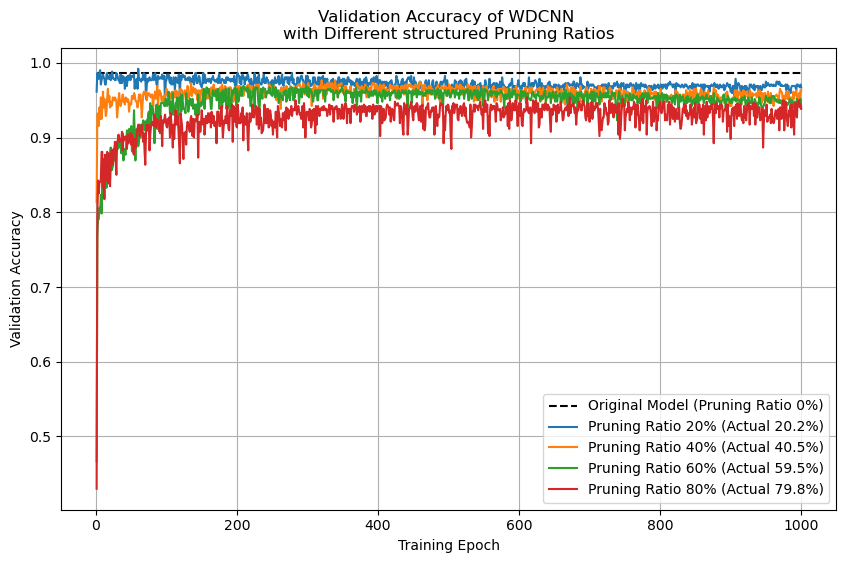

In [40]:
import matplotlib.pyplot as plt

# 🔹 그래프 그리기
plt.figure(figsize=(10, 6))

# ✅ Original Model Plot (Pruning 0%)
original_results = structured_experiment_results[0]
plt.plot(range(1, num_epochs+1), original_results["Validation Accuracy per Epoch"], 
         label="Original Model (Pruning Ratio 0%)", linestyle="--", color="black")

# ✅ Structured Pruned Models Plot
for result in structured_experiment_results[1:]:
    pruning_ratio = result["Requested Pruning Ratio"]
    actual_ratio = result["Actual Pruning Ratio"]
    val_accuracies = result["Validation Accuracy per Epoch"]
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label=f"Pruning Ratio {pruning_ratio*100:.0f}% (Actual {actual_ratio*100:.1f}%)")

plt.xlabel("Training Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of WDCNN \nwith Different structured Pruning Ratios")
plt.legend()
plt.grid(True)
plt.show()


### Cell 4.4.2 Test Acc 비교 Table

100

In [41]:
import pandas as pd
import torch
import time
from IPython.display import display

save_dir = "CWRU/Structured"

# 🔹 비-제로 가중치 개수 계산 함수
def count_nonzero_parameters(model):
    return sum((p != 0).sum().item() for p in model.parameters() if p.requires_grad)

# 🔹 Inference Time 측정 함수 (100개 샘플 평균)
def measure_inference_time(model, test_loader, device, num_samples=100):
    model.eval()
    total_time = 0.0
    num_runs = 0

    with torch.no_grad():
        for inputs, _ in test_loader:
            if num_runs >= num_samples:
                break
            inputs = inputs.to(device)

            # 시간 측정 시작
            start_time = time.time()
            _ = model(inputs)
            end_time = time.time()

            total_time += (end_time - start_time)
            num_runs += 1

    return total_time / num_runs if num_runs > 0 else 0.0  # 평균 Inference Time (초)

# 🔹 Test Accuracy 결과 저장
test_accuracies = []

# ✅ 원본 모델 (Pruning 0%) 성능 평가
print("\n🔹 Evaluating Original Model on Test Set (Pruning 0%)")
original_model = WDCNN().to(device)
original_model.load_state_dict(torch.load("best_overall_model.pth", map_location=device))

# ✅ Original Model Test Accuracy 측정
original_model.eval()
test_correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = original_model(inputs)
        test_correct += (outputs.argmax(dim=1) == labels).sum().item()

original_test_acc = test_correct / len(test_loader.dataset)
original_nonzero_params = count_nonzero_parameters(original_model)
original_inference_time = measure_inference_time(original_model, test_loader, device)

test_accuracies.append({
    "Requested Pruning Ratio": 0.0,
    "Actual Pruning Ratio": 0.0,
    "Number of Non-Zero Params": original_nonzero_params,  # 수정: Non-Zero Params 제대로 삽입
    "Inference Time (s)": original_inference_time,
    "Test Accuracy": original_test_acc
})

print(f"✅ Original Model - Test Accuracy: {original_test_acc:.4f}, Non-Zero Params: {original_nonzero_params}, Inference Time: {original_inference_time:.6f} s")

# 🔹 Pruned Models Test Accuracy 측정
for result in structured_experiment_results[1:]:  # ✅ 원본 모델 제외
    pruning_ratio = result["Requested Pruning Ratio"]
    actual_ratio = result["Actual Pruning Ratio"]
    model_path = os.path.join(save_dir, f"best_structured_finetuned_{int(pruning_ratio*100)}.pth")

    # 🔹 Best Model 로드 (Pruning Mask 없이)
    model = WDCNN().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device), strict=False)  # ✅ strict=False 추가

    # 🔹 Non-Zero Parameters 계산
    nonzero_params = count_nonzero_parameters(model)

    # 🔹 Test Accuracy 측정
    model.eval()
    test_correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            test_correct += (outputs.argmax(dim=1) == labels).sum().item()

    test_acc = test_correct / len(test_loader.dataset)

    # 🔹 Inference Time 측정
    inference_time = measure_inference_time(model, test_loader, device)

    test_accuracies.append({
        "Requested Pruning Ratio": pruning_ratio,
        "Actual Pruning Ratio": actual_ratio,
        "Number of Non-Zero Params": nonzero_params,
        "Inference Time (s)": inference_time,
        "Test Accuracy": test_acc
    })

    print(f"✅ Pruning {pruning_ratio*100:.0f}% - Test Accuracy: {test_acc:.4f}, Non-Zero Params: {nonzero_params}, Inference Time: {inference_time:.6f} s")

# 🔹 Test Accuracy 비교 표 생성
results_df = pd.DataFrame(test_accuracies)

# 🔹 Test Accuracy 표 출력
display(results_df)



🔹 Evaluating Original Model on Test Set (Pruning 0%)
✅ Original Model - Test Accuracy: 0.9885, Non-Zero Params: 41404, Inference Time: 0.000968 s
✅ Pruning 20% - Test Accuracy: 0.9827, Non-Zero Params: 34684, Inference Time: 0.000950 s
✅ Pruning 40% - Test Accuracy: 0.9693, Non-Zero Params: 27916, Inference Time: 0.001215 s
✅ Pruning 60% - Test Accuracy: 0.9405, Non-Zero Params: 21612, Inference Time: 0.001280 s
✅ Pruning 80% - Test Accuracy: 0.9386, Non-Zero Params: 14844, Inference Time: 0.001053 s


,Requested Pruning Ratio,Actual Pruning Ratio,Number of Non-Zero Params,Inference Time (s),Test Accuracy
0,0.0,0.000000,41404,0.000968,0.988484
1,0.2,0.201923,34684,0.000950,0.982726
2,0.4,0.405288,27916,0.001215,0.969290
3,0.6,0.594712,21612,0.001280,0.940499
4,0.8,0.798077,14844,0.001053,0.938580
